In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_trns=pd.read_csv("transactions.csv")
df_store=pd.read_csv("stores.csv")
df_oil=pd.read_csv("oil.csv")
df_hdy=pd.read_csv("holidays_events.csv")

## Expolatory data analysis

In [3]:
# read all the data set
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0


In [4]:
df_store.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [5]:
df_hdy.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [6]:
df_trns.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [7]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [8]:
df_train.info(),df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214848 entries, 0 to 214847
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           214848 non-null  int64  
 1   date         214848 non-null  object 
 2   store_nbr    214847 non-null  float64
 3   family       214847 non-null  object 
 4   sales        214847 non-null  float64
 5   onpromotion  214847 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.8+ MB


(None, (214848, 6))

In [9]:
df_store.info(),df_store.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


(None, (54, 5))

In [10]:
df_oil.info(),df_oil.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


(None, (1218, 2))

In [11]:
df_trns.info(),df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


(None, (214848, 6))

In [12]:
df_hdy.info(),df_hdy.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


(None, (350, 6))

In [13]:
# extract dates
df_train['year']=df_train['date'].apply(lambda x:x[:4])
df_train['month']=df_train['date'].apply(lambda x:x[5:7])
df_train.drop('date',axis=1,inplace=True)

In [14]:
df_train.dropna(axis=0,inplace=True)
df_train.head()

,id,store_nbr,family,sales,onpromotion,year,month
0,0,1.0,AUTOMOTIVE,0.0,0.0,2013,01
1,1,1.0,BABY CARE,0.0,0.0,2013,01
2,2,1.0,BEAUTY,0.0,0.0,2013,01
3,3,1.0,BEVERAGES,0.0,0.0,2013,01
4,4,1.0,BOOKS,0.0,0.0,2013,01


<AxesSubplot:>

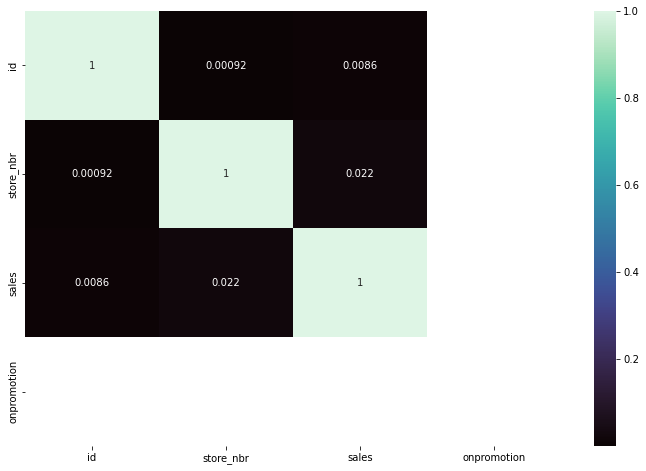

In [15]:
#corr
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),cmap='mako',annot=True)

<AxesSubplot:>

<Figure size 864x648 with 0 Axes>

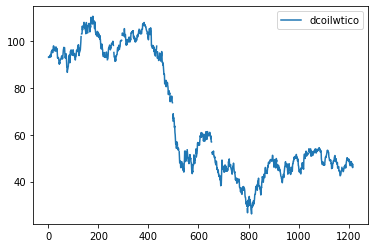

In [16]:
plt.figure(figsize=(12,9))
df_oil.plot()

<BarContainer object of 214847 artists>

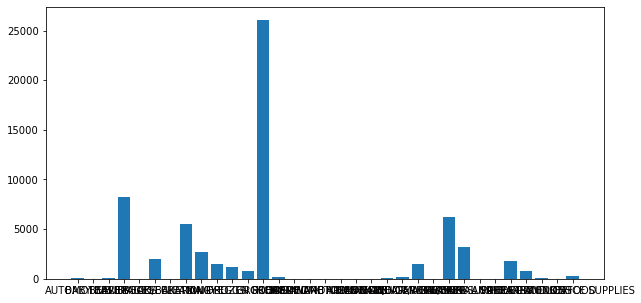

In [18]:
# high selling products among all of them 
plt.figure(figsize=(10,5))
plt.bar(df_train['family'],df_train['sales']) 

In [15]:
# here we  are calculating the percentage of product selling comapre to others

In [16]:
# top 6 sellling products

In [17]:
hk=df_train[df_train['family']=='HARDWARE']
gt=df_train[df_train['family']=='GROCERY I']
ff=df_train[df_train['family']=='EGGS']
bb=df_train[df_train['family']=='BOOKS']
ps=df_train[df_train['family']=='MEATS ']
lg=df_train[df_train['family']=='LAWN AND GARDEN']

In [119]:
# product stats

# here we see the product sell more in which store

<BarContainer object of 6511 artists>

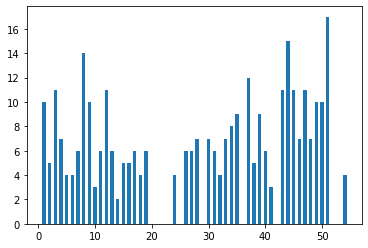

In [105]:
plt.bar(hk['store_nbr'],hk['sales'],width=0.6)

<BarContainer object of 6511 artists>

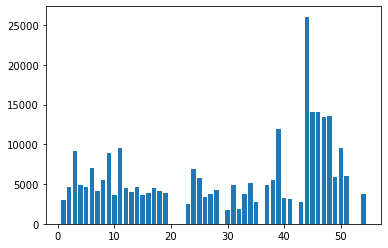

In [24]:
plt.bar(gt['store_nbr'],gt['sales'])

In [18]:
hk['family'].count()/df_train['family'].count()*100

3.0305287018203653

In [19]:
gt['family'].count()/df_train['family'].count()*100

3.0305287018203653

In [20]:
bb['family'].count()/df_train['family'].count()*100

3.0305287018203653

In [21]:
ps['family'].count()/df_train['family'].count()*100

0.0

In [22]:
lg['family'].count()/df_train['family'].count()*100

3.030063254315862

# transaction data set

In [160]:
df_trns.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [23]:
df_mean=df_trns[df_trns['transactions']>df_trns['transactions'].mean()]

<BarContainer object of 83488 artists>

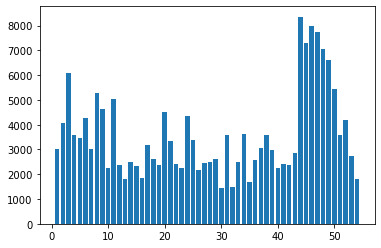

In [33]:
# store which have highest transcation
plt.bar(df_trns['store_nbr'],df_trns['transactions'])

In [24]:
df_trns['year']=df_trns['date'].apply(lambda x: x[:4])
df_trns['month']=df_trns['date'].apply(lambda x: x[5:7])
df_trns.drop('date',axis=1,inplace=True)
df_trns.head()

,store_nbr,transactions,year,month
0,25,770,2013,01
1,1,2111,2013,01
2,2,2358,2013,01
3,3,3487,2013,01
4,4,1922,2013,01


<BarContainer object of 83488 artists>

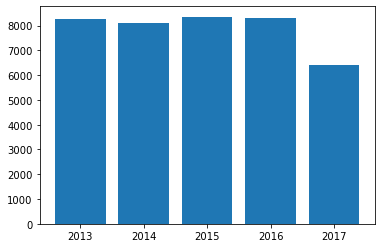

In [163]:
# lowest transcation happen in year 2017
plt.bar(df_trns['year'],df_trns['transactions'])

<BarContainer object of 30342 artists>

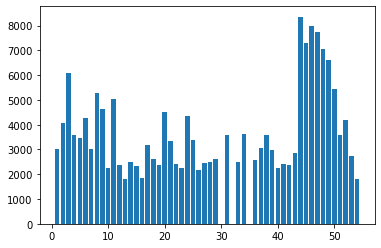

In [26]:
# stores having highest transactions
plt.bar(df_mean['store_nbr'],df_mean['transactions'])

# holiday dataset

In [25]:
df_hdy.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [26]:
df_hdy['transferred'].value_counts()

False    338
True      12
Name: transferred, dtype: int64

In [27]:
df_hdy['year']=df_hdy['date'].apply(lambda x: x[:4])
df_hdy['month']=df_hdy['date'].apply(lambda x: x[5:7])
df_hdy.drop('date',axis=1,inplace=True)
df_hdy

,type,locale,locale_name,description,transferred,year,month
0,Holiday,Local,Manta,Fundacion de Manta,False,2012,03
1,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,2012,04
2,Holiday,Local,Cuenca,Fundacion de Cuenca,False,2012,04
3,Holiday,Local,Libertad,Cantonizacion de Libertad,False,2012,04
4,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,2012,04
...,...,...,...,...,...,...,...
345,Additional,National,Ecuador,Navidad-3,False,2017,12
346,Additional,National,Ecuador,Navidad-2,False,2017,12
347,Additional,National,Ecuador,Navidad-1,False,2017,12
348,Holiday,National,Ecuador,Navidad,False,2017,12


In [28]:
df_hdy['type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

In [29]:
#encoding all categorical varaible
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [30]:
df_hdy['type']=df_hdy['type'].astype(str)
df_hdy['description']=df_hdy['description'].astype(str)
df_hdy['locale']=df_hdy['locale'].astype(str)
df_hdy['locale_name']=df_hdy['locale_name'].astype(str)
df_hdy['transferred']=df_hdy['transferred'].astype(str)

In [31]:
# encoded value
df_hdy['type']=le.fit_transform(df_hdy['type'])
df_hdy['description']=le.fit_transform(df_hdy['description'])
df_hdy['locale']=le.fit_transform(df_hdy['locale'])
df_hdy['locale_name']=le.fit_transform(df_hdy['locale_name'])
df_hdy['transferred']=le.fit_transform(df_hdy['transferred'])

<AxesSubplot:>

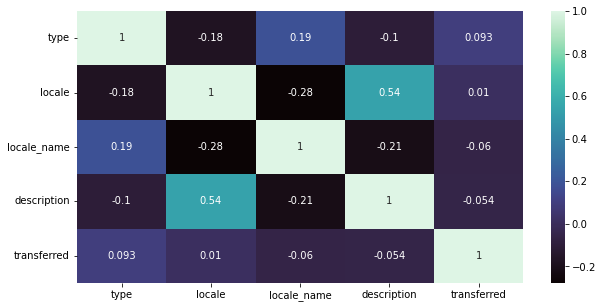

In [74]:
plt.figure(figsize=(10,5))
sns.heatmap(df_hdy.corr(),annot=True,cmap='mako')

# stores data

In [32]:
df_store.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [33]:
df_store['type'].value_counts()

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64

In [34]:
df_store['state']=df_store['state'].astype(str)
df_store['city']=df_store['city'].astype(str)
df_store['type']=df_store['type'].astype(str)

In [35]:
df_store['state']=le.fit_transform(df_store['state'])
df_store['city']=le.fit_transform(df_store['city'])
df_store['type']=le.fit_transform(df_store['type'])

<AxesSubplot:>

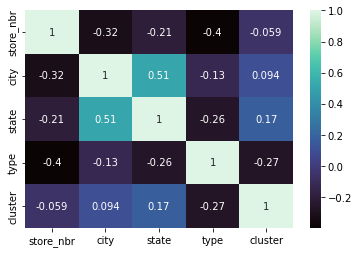

In [36]:
#corr
sns.heatmap(df_store.corr(),annot=True,cmap='mako')

<AxesSubplot:xlabel='type', ylabel='cluster'>

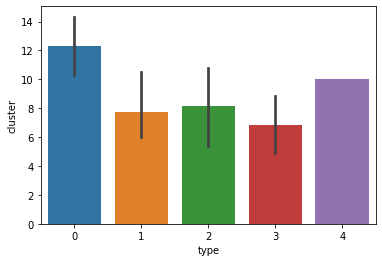

In [37]:
sns.barplot(x='type',y='cluster',data=df_store)

In [38]:
df_train=pd.merge(df_train,df_store)

In [39]:
df_train=pd.merge(df_train,df_hdy)

In [40]:
df_train.drop(columns=(['onpromotion','description','transferred','locale_name','locale']),axis=1,inplace=True)

In [41]:
df_train['store_nbr']=df_train['store_nbr'].astype(int)
df_train['sales']=df_train['sales'].astype(int)
df_train.head()

,id,store_nbr,family,sales,year,month,city,state,type,cluster
0,0,1,AUTOMOTIVE,0,2013,01,18,12,3,13
1,1,1,BABY CARE,0,2013,01,18,12,3,13
2,2,1,BEAUTY,0,2013,01,18,12,3,13
3,3,1,BEVERAGES,0,2013,01,18,12,3,13
4,4,1,BOOKS,0,2013,01,18,12,3,13


In [42]:
# these are ther top selling products in all the items
df_train=df_train[df_train['sales']>df_train['sales'].mean()]

<AxesSubplot:xlabel='store_nbr', ylabel='family'>

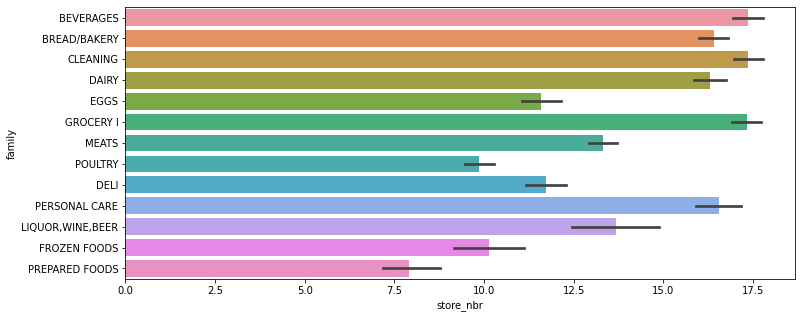

In [45]:
plt.figure(figsize=(12,5))
sns.barplot(x='store_nbr',y='family',data=df_train)

# its looking like there is some of the product is high seling in some store
# so we have to markdown the products

# Doing some statistical analysis for Satationary data

In [43]:
# importing relevant libraries
from statsmodels.tsa.stattools import adfuller

In [44]:
def adfuller_test(series):
    result=adfuller(series.dropna(), autolag=None)
    print('p-value {}'.format(result[1]))
    if result[1]<=0.05:
        print("reject null hypothesis which is data is not Sationary")
    else:
        print("accept alternative  hypothesis : Data is sationary")

In [45]:
adfuller_test(df_train.sales)

p-value 1.7116093854675986e-23
reject null hypothesis which is data is not Sationary


# lets convert data into sationary

In [46]:
# plotting Auto correlation graph
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

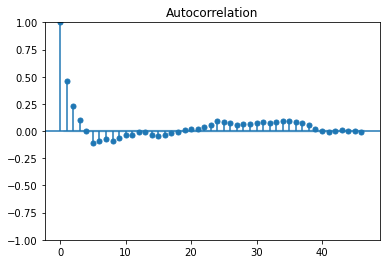

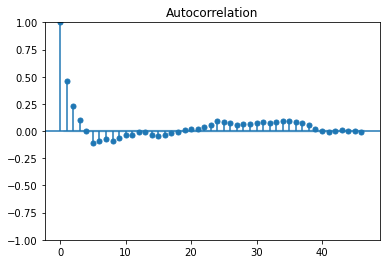

In [47]:
#acf graph
plot_acf(df_train.sales,adjusted=True,alpha=0.09)

/Users/snehgauraha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


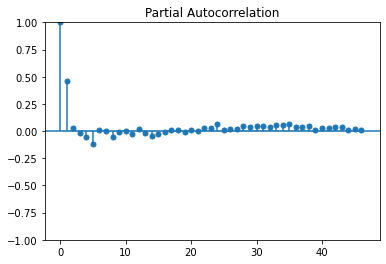

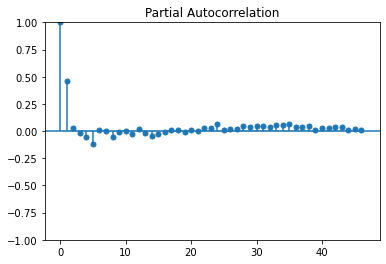

In [48]:
#plot pacf graph
plot_pacf(df_train.sales,alpha=0.09)

In [49]:
#p=3
#d=0
#q=4

# Now creating arima model for sales forecasting 

In [50]:
# importing model libraries
from statsmodels.tsa.arima.model import ARIMA

In [81]:
#model creating 
model=ARIMA(df_train.sales,order=(3,0,4))

/Users/snehgauraha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/snehgauraha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/snehgauraha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [82]:
modelfit=model.fit()

/Users/snehgauraha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [53]:
#model Summary
print(modelfit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                32302
Model:                 ARIMA(3, 0, 4)   Log Likelihood             -265083.242
Date:                Thu, 08 Sep 2022   AIC                         530184.484
Time:                        22:31:05   BIC                         530259.929
Sample:                             0   HQIC                        530208.606
                              - 32302                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        903.5816     11.135     81.147      0.000     881.757     925.406
ar.L1          0.5557      0.025     21.974      0.000       0.506       0.605
ar.L2          0.7803      0.028     28.056      0.0

In [90]:
df_new=pd.DataFrame()
df_new['sales']=df_train.sales
df_new['forecast']=modelfit.predict()
df_new.set_index(df_train['id'])

,sales,forecast
id,,
1785,1091,903.581615
1787,470,990.527620
1789,1060,711.647138
1790,579,951.355612
1792,246,761.030751
...,...,...
214722,254,1952.503926
214723,290,763.844960
214767,400,575.320931
